In [187]:
import pandas as pd
import matplotlib.pyplot as plt

In [188]:
df=pd.read_csv('train.csv')

In [189]:
df.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159092,f85df6f951a1e234,"""\n\n why ? \n\nI do not understand the """"thi...",0,0,0,0,0,0
46258,7b8eec60d2e6cebe,CBW history link\nI'm going to try to kill a f...,0,0,0,0,0,0
52102,8b6919a576b725b2,Edits to Derby County F.C. \n\nWhy did you rev...,0,0,0,0,0,0
121853,8be6c9c045628b47,"GA process\n\n, thank you for your thorough re...",0,0,0,0,0,0
128339,ae5fb4efda43503d,"By the way, I like the work you're doing on Cr...",0,0,0,0,0,0


In [190]:
category=['normal','toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [192]:
df['y'] = (df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) > 0 ).astype(int)
df = df[["comment_text", 'y']].rename(columns={'comment_text': 'text'})


In [193]:
df.sample(5)

,text,y
106251,can also use them to make detailed island maps...,0
52713,"""==History of the Latter Day Saint movement==\...",0
123202,"""\n\nI'm not going to participate in a mediati...",0
151835,Power as the product of force and velocity \n\...,0
36350,"""\n\nWhy yes, as a matter of fact I do, and it...",0


In [194]:
df['y'].value_counts()

0    143346
1     16225
Name: y, dtype: int64

In [195]:
min_len=(df['y'] == 1).sum()

In [196]:
df_min = df[df['y'] == 0].sample(n=min_len, random_state=150)
df = pd.concat([df[df['y'] == 1], df_min])
df['y'].value_counts()

1    16225
0    16225
Name: y, dtype: int64

In [197]:
df

,text,y
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
12,Hey... what is it..\n@ | talk .\nWhat is it......,1
16,"Bye! \n\nDon't look, come or think of comming ...",1
42,You are gay or antisemmitian? \n\nArchangel WH...,1
43,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1
...,...,...
147639,"""\n\n Hunting for embedded outlines \n\nWhile ...",0
155676,I will look into it.,0
17313,Hidden Palms \n\nMidseason entry Hidden Palms ...,0
135477,What do you suggest then? We shouldn't leave t...,0


In [198]:
import preprocess_kgptalkie as ps

In [199]:
df['text']=df['text'].apply(lambda x:ps.remove_special_chars(x))

In [200]:
X=df['text']
y=df['y']

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size = 0.8,random_state = 42, stratify = y)

In [203]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [204]:
model=make_pipeline(TfidfVectorizer(),MultinomialNB())

In [205]:
model.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [206]:
model.score(X_train,y_train)

0.9234591679506934

In [207]:
model.score(X_test,y_test)

0.8721109399075501

In [208]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [210]:
etiketler=model.predict(X_test)

In [211]:
mat=confusion_matrix(y_test,etiketler)

Text(91.68, 0.5, 'Tahmin Etiketleri')

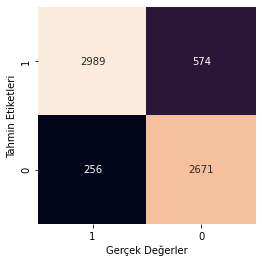

In [212]:
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
           xticklabels=y_test.value_counts().keys(),yticklabels=y_test.value_counts().keys())
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Etiketleri')

In [213]:
from sklearn.metrics import classification_report
report=classification_report(y_test,etiketler)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3245
           1       0.91      0.82      0.87      3245

    accuracy                           0.87      6490
   macro avg       0.88      0.87      0.87      6490
weighted avg       0.88      0.87      0.87      6490



In [214]:
df.sample(15)


,text,y
107960,REDIRECT Talk2009 Brit Awards,0
130070,Hypocricy and JealousyI want to let everyone h...,1
43257,Your from a family of donkeys,1
28018,The Yemen times article is full of misinformat...,0
157582,Support The most well known Las Vegas is Las V...,0
73439,Keep up the Good WorkUser Fyunclicks edits are...,0
114119,See you See you later dickhead hope you never ...,1
79139,I see you have now meet MR Goethean I tried ve...,0
40338,Admins and cowards The fact is admins have bee...,1
135658,12 July 2009 UTCI think we have all establishe...,1


In [215]:
df['text'][119099]

'U552 Reverts That wasnt me you fucking moron You just blocked the wrong person and the idiot that is claiming it was a war crime has just undone someone elses work If you look at what he has written and then look at his sources you will see that they do not support his case75181143239'

In [216]:
def predict_category(s,model=model):
    pred=model.predict([s])
    print(pred)
    print(category[pred[0]])

In [217]:
# 0:'normal',1:'toxic'
predict_category('you are a very good person')

[0]
normal
